<a href="https://colab.research.google.com/github/SamudiniD/Efficient-Denoising-for-single-band-astronomical-images/blob/main/Noise2Noise_100ep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-----------------------------------------------

import os
import numpy as np
from astropy.io import fits
import tensorflow as tf

# -----------------------------
# Configuration
# -----------------------------
noisy_dir = "/content/drive/MyDrive/sdss_image_dataset/train/noisy"
clean_dir = "/content/drive/MyDrive/sdss_image_dataset/train/clean"

output_noisy = "/content/drive/MyDrive/SDSS_augmented_npy/train/noisy.npy"
output_clean = "/content/drive/MyDrive/SDSS_augmented_npy/train/clean.npy"

resize_shape = (240, 240)  # target size for model

# -----------------------------
# FITS Preprocessing Function
# -----------------------------
def process_fits(path):
    with fits.open(path) as hdul:
        img = hdul[0].data.astype(np.float32)
        img = np.nan_to_num(img, nan=0.0, posinf=0.0, neginf=0.0)
        p1, p99 = np.percentile(img, (1, 99))
        img = np.clip(img, p1, p99)
        img = (img - p1) / (p99 - p1 + 1e-8)
        img = np.log1p(img) / np.log1p(1.0)
        img = tf.image.resize(img[..., np.newaxis], resize_shape).numpy()
        return img.astype(np.float32)

# -----------------------------
# Load and Convert All FITS
# -----------------------------
noisy_files = sorted([f for f in os.listdir(noisy_dir) if f.endswith(".fits")])
clean_files = sorted([f for f in os.listdir(clean_dir) if f.endswith(".fits")])

noisy_stack = []
clean_stack = []

for nf, cf in zip(noisy_files, clean_files):
    noisy_path = os.path.join(noisy_dir, nf)
    clean_path = os.path.join(clean_dir, cf)

    noisy_stack.append(process_fits(noisy_path))
    clean_stack.append(process_fits(clean_path))

noisy_np = np.stack(noisy_stack)
clean_np = np.stack(clean_stack)

np.save(output_noisy, noisy_np)
np.save(output_clean, clean_np)

print(f"✅ Saved {noisy_np.shape} to {output_noisy}")
print(f"✅ Saved {clean_np.shape} to {output_clean}")


✅ Saved (1050, 240, 240, 1) to /content/drive/MyDrive/SDSS_augmented_npy/train/noisy.npy
✅ Saved (1050, 240, 240, 1) to /content/drive/MyDrive/SDSS_augmented_npy/train/clean.npy


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 240, 240,  │        320 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 240, 240,  │      9,248 │ conv2d_60[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 120, 120,  │          0 │ conv2d_61[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 120, 120,  │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 120, 120,  │     36,928 │ conv2d_62[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 60, 60,    │          0 │ conv2d_63[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 60, 60,    │     73,856 │ max_pooling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 60, 60,    │    147,584 │ conv2d_64[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 30, 30,    │          0 │ conv2d_65[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 30, 30,    │    295,168 │ max_pooling2d_14… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 30, 30,    │    590,080 │ conv2d_66[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_12    │ (None, 60, 60,    │          0 │ conv2d_67[0][0]   │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 60, 60,    │          0 │ up_sampling2d_12… │
│ (Concatenate)       │ 384)              │            │ conv2d_65[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 60, 60,    │    442,496 │ concatenate_12[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 60, 60,    │    147,584 │ conv2d_68[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_13    │ (None, 120, 120,  │          0 │ conv2d_69[0][0] 

 Total params: 1,946,305 (7.42 MB)

 Trainable params: 1,946,305 (7.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4803

119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - loss: 0.4803 - val_loss: 0.4778 - learning_rate: 1.0000e-04
Epoch 2/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4747

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4747 - val_loss: 0.4728 - learning_rate: 1.0000e-04
Epoch 3/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4702

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4702 - val_loss: 0.4712 - learning_rate: 1.0000e-04
Epoch 4/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4698

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4698 - val_loss: 0.4705 - learning_rate: 1.0000e-04
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4690 - val_loss: 0.4713 - learning_rate: 1.0000e-04
Epoch 6/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4687

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4687 - val_loss: 0.4694 - learning_rate: 1.0000e-04
Epoch 7/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4683

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4683 - val_loss: 0.4693 - learning_rate: 1.0000e-04
Epoch 8/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4675

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4675 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 9/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4679

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4679 - val_loss: 0.4685 - learning_rate: 1.0000e-04
Epoch 10/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4669 - val_loss: 0.4702 - learning_rate: 1.0000e-04
Epoch 11/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4684 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 12/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.4676 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 13/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4670 - val_loss: 0.4687 - learning_rate: 1.0000e-04
Epoch 14/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4669

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4669 - val_loss: 0.4680 - learning_rate: 1.0000e-04
Epoch 15/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4664 - val_loss: 0.4689 - learning_rate: 1.0000e-04
Epoch 16/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4669 - val_loss: 0.4683 - learning_rate: 1.0000e-04
Epoch 17/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4664

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4664 - val_loss: 0.4679 - learning_rate: 1.0000e-04
Epoch 18/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4665 - val_loss: 0.4680 - learning_rate: 1.0000e-04
Epoch 19/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4661

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4661 - val_loss: 0.4670 - learning_rate: 1.0000e-04
Epoch 20/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4659 - val_loss: 0.4672 - learning_rate: 1.0000e-04
Epoch 21/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4656

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4656 - val_loss: 0.4666 - learning_rate: 1.0000e-04
Epoch 22/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4656

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4656 - val_loss: 0.4665 - learning_rate: 1.0000e-04
Epoch 23/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4657

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4657 - val_loss: 0.4661 - learning_rate: 1.0000e-04
Epoch 24/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4654

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4654 - val_loss: 0.4655 - learning_rate: 1.0000e-04
Epoch 25/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4659 - val_loss: 0.4659 - learning_rate: 1.0000e-04
Epoch 26/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4652 - val_loss: 0.4660 - learning_rate: 1.0000e-04
Epoch 27/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4664 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 28/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4647 - val_loss: 0.4657 - learning_rate: 1.0000e-04
Epoch 29/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4642

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4642 - val_loss: 0.4649 - learning_rate: 1.0000e-04
Epoch 30/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4650 - val_loss: 0.4651 - learning_rate: 1.0000e-04
Epoch 31/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4637 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 32/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4661 - val_loss: 0.4662 - learning_rate: 1.0000e-04
Epoch 33/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4651

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4651 - val_loss: 0.4647 - learning_rate: 1.0000e-04
Epoch 34/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4654

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4654 - val_loss: 0.4646 - learning_rate: 1.0000e-04
Epoch 35/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4644 - val_loss: 0.4660 - learning_rate: 1.0000e-04
Epoch 36/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4647 - val_loss: 0.4648 - learning_rate: 1.0000e-04
Epoch 37/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4649 - val_loss: 0.4648 - learning_rate: 1.0000e-04
Epoch 38/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4653 - val_loss: 0.4652 - learning_rate: 1.0000e-04
Epoch 39/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4642 - val_loss: 0.4657 - learning_rate: 5.0000e-05
Epoch 40/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4646

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.4646 - val_loss: 0.4644 - learning_rate: 5.0000e-05
Epoch 41/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4639 - val_loss: 0.4645 - learning_rate: 5.0000e-05
Epoch 42/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4645 - val_loss: 0.4648 - learning_rate: 5.0000e-05
Epoch 43/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4641

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4641 - val_loss: 0.4643 - learning_rate: 5.0000e-05
Epoch 44/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4649 - val_loss: 0.4643 - learning_rate: 5.0000e-05
Epoch 45/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4646

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4646 - val_loss: 0.4642 - learning_rate: 5.0000e-05
Epoch 46/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4637 - val_loss: 0.4642 - learning_rate: 5.0000e-05
Epoch 47/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4643

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4643 - val_loss: 0.4641 - learning_rate: 5.0000e-05
Epoch 48/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4645 - val_loss: 0.4643 - learning_rate: 5.0000e-05
Epoch 49/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4643 - val_loss: 0.4643 - learning_rate: 5.0000e-05
Epoch 50/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4636 - val_loss: 0.4646 - learning_rate: 5.0000e-05
Epoch 51/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4639 - val_loss: 0.4654 - learning_rate: 2.5000e-05
Epoch 52/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4637 - val_loss: 0.4643 - learning_rate: 2.5000e-05
Epoch 53/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4627 - val_loss: 0.4647 - learning_rate: 2.5000e-05
Epoch 54/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4637 - val_loss: 0.4646 - learning_rate: 2.5000e-05
Epoch 55/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4633 - val_l

✅ Model trained and saved!


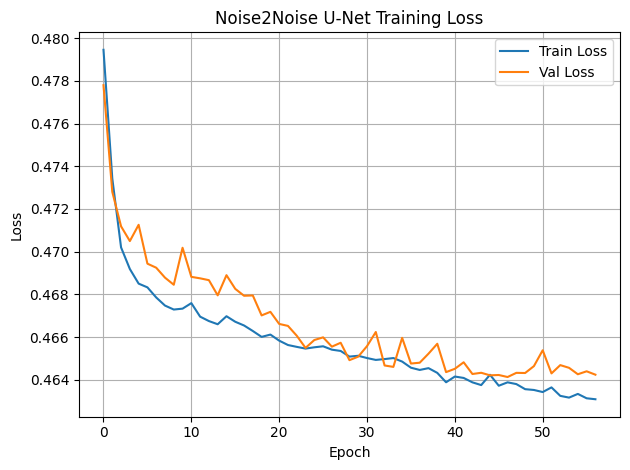

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers

# -------------------------------
# 1. Load .npy files
# -------------------------------
X = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/noisy.npy")
Y = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/clean.npy")

# Normalize just in case
X = np.clip(X, 0, 1).astype(np.float32)
Y = np.clip(Y, 0, 1).astype(np.float32)

# Add channel dimension
if X.ndim == 3:
    X = X[..., np.newaxis]
if Y.ndim == 3:
    Y = Y[..., np.newaxis]

# -------------------------------
# 2. Train-Test Split
# -------------------------------
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# -------------------------------
# 3. SSIM + MSE Loss Function
# -------------------------------
def ssim_mse_loss(y_true, y_pred):
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.5 * mse + 0.5 * (1 - ssim)

# -------------------------------
# 4. U-Net Model Definition
# -------------------------------
def build_unet(input_shape=(240, 240, 1), base_filters=32, depth=3):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    skips = []

    for d in range(depth):
        x = layers.Conv2D(base_filters * 2**d, 3, padding='same', activation='relu')(x)
        x = layers.Conv2D(base_filters * 2**d, 3, padding='same', activation='relu')(x)
        skips.append(x)
        x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(base_filters * 2**depth, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(base_filters * 2**depth, 3, padding='same', activation='relu')(x)

    for d in reversed(range(depth)):
        x = layers.UpSampling2D()(x)
        x = layers.Concatenate()([x, skips[d]])
        x = layers.Conv2D(base_filters * 2**d, 3, padding='same', activation='relu')(x)
        x = layers.Conv2D(base_filters * 2**d, 3, padding='same', activation='relu')(x)

    outputs = layers.Conv2D(1, 1, activation='sigmoid', padding='same')(x)
    return models.Model(inputs, outputs)

# -------------------------------
# 5. Compile and Train
# -------------------------------
model = build_unet()
model.compile(optimizer=optimizers.Adam(1e-4), loss=ssim_mse_loss)
model.summary()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_best.h5', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
]

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=8,
    callbacks=callbacks,
    shuffle=True
)

# -------------------------------
# 6. Save final model
# -------------------------------
model.save('/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5')
print("✅ Model trained and saved!")

# -------------------------------
# 7. Plot training history
# -------------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Noise2Noise U-Net Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Model loaded!

📊 Evaluation Metrics:
PSNR: 13.98 dB
SSIM: 0.3904


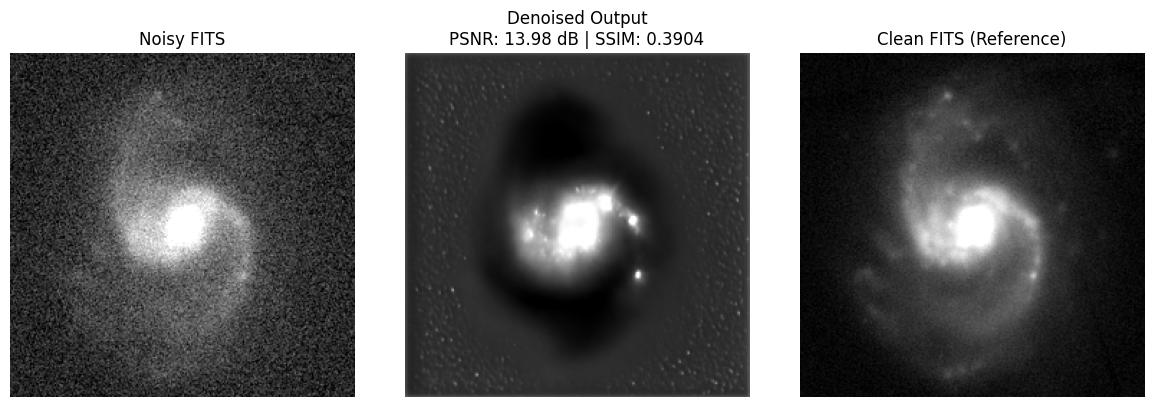

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from astropy.io import fits
from tensorflow.keras.models import load_model
from skimage.metrics import peak_signal_noise_ratio as psnr_metric
from skimage.metrics import structural_similarity as ssim_metric

# -----------------------------
# 1. Define custom loss again
# -----------------------------
def ssim_mse_loss(y_true, y_pred):
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.5 * mse_loss + 0.5 * ssim_loss

# -----------------------------
# 2. Load model with custom_objects
# -----------------------------
model_path = "/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5"
model = load_model(model_path, custom_objects={'ssim_mse_loss': ssim_mse_loss})
print("✅ Model loaded!")

# -----------------------------
# 3. Load FITS Image Pair
# -----------------------------
noisy_path = "/content/drive/MyDrive/PS1_Dataset/renamed/noisy/galaxy_004_noisy.fits"
clean_path = "/content/drive/MyDrive/PS1_Dataset/renamed/clean/galaxy_004_clean.fits"

def load_fits_normalized(path):
    with fits.open(path) as hdul:
        img = hdul[0].data.astype(np.float32)
        img = np.nan_to_num(img, nan=0.0, posinf=0.0, neginf=0.0)
        p1, p99 = np.percentile(img, (1, 99))
        img = np.clip(img, p1, p99)
        img = (img - p1) / (p99 - p1 + 1e-8)
        img = np.log1p(img) / np.log1p(1.0)
        return img

noisy_img = load_fits_normalized(noisy_path)
clean_img = load_fits_normalized(clean_path)

# Resize to 240x240 for model input
noisy_resized = tf.image.resize(noisy_img[..., np.newaxis], (240, 240)).numpy().squeeze()
clean_resized = tf.image.resize(clean_img[..., np.newaxis], (240, 240)).numpy().squeeze()

# -----------------------------
# 4. Predict denoised output
# -----------------------------
input_tensor = noisy_resized[np.newaxis, ..., np.newaxis]
denoised = model.predict(input_tensor, verbose=0)[0, ..., 0]

# -----------------------------
# 5. Evaluation Metrics
# -----------------------------
psnr = psnr_metric(clean_resized, denoised, data_range=1.0)
ssim = ssim_metric(clean_resized, denoised, data_range=1.0)

print("\n📊 Evaluation Metrics:")
print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim:.4f}")

# -----------------------------
# 6. Visualization
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, img, title in zip(
    axes,
    [noisy_resized, denoised, clean_resized],
    ["Noisy FITS", f"Denoised Output\nPSNR: {psnr:.2f} dB | SSIM: {ssim:.4f}", "Clean FITS (Reference)"]
):
    ax.imshow(img, cmap="gray", vmin=np.percentile(img, 1), vmax=np.percentile(img, 99))
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


🕒 Starting training...
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4805

119/119 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 0.4805 - val_loss: 0.4781 - learning_rate: 1.0000e-04
Epoch 2/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4747

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4747 - val_loss: 0.4728 - learning_rate: 1.0000e-04
Epoch 3/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4711

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4711 - val_loss: 0.4715 - learning_rate: 1.0000e-04
Epoch 4/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4696

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4696 - val_loss: 0.4706 - learning_rate: 1.0000e-04
Epoch 5/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4685

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4685 - val_loss: 0.4699 - learning_rate: 1.0000e-04
Epoch 6/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4680

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4680 - val_loss: 0.4689 - learning_rate: 1.0000e-04
Epoch 7/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4681

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4681 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 8/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4681

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4681 - val_loss: 0.4686 - learning_rate: 1.0000e-04
Epoch 9/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4672

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4672 - val_loss: 0.4682 - learning_rate: 1.0000e-04
Epoch 10/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4669 - val_loss: 0.4699 - learning_rate: 1.0000e-04
Epoch 11/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4679

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4679 - val_loss: 0.4674 - learning_rate: 1.0000e-04
Epoch 12/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4661 - val_loss: 0.4688 - learning_rate: 1.0000e-04
Epoch 13/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4664

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4664 - val_loss: 0.4666 - learning_rate: 1.0000e-04
Epoch 14/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4658 - val_loss: 0.4763 - learning_rate: 1.0000e-04
Epoch 15/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4680 - val_loss: 0.4674 - learning_rate: 1.0000e-04
Epoch 16/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4666

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4666 - val_loss: 0.4657 - learning_rate: 1.0000e-04
Epoch 17/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4663 - val_loss: 0.4674 - learning_rate: 1.0000e-04
Epoch 18/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4655

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4655 - val_loss: 0.4649 - learning_rate: 1.0000e-04
Epoch 19/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4654 - val_loss: 0.4651 - learning_rate: 1.0000e-04
Epoch 20/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4657 - val_loss: 0.4687 - learning_rate: 1.0000e-04
Epoch 21/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4665 - val_loss: 0.4653 - learning_rate: 1.0000e-04
Epoch 22/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4644 - val_loss: 0.4665 - learning_rate: 1.0000e-04
Epoch 23/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4651 - val_loss: 0.4654 - learning_rate: 1.0000e-04
Epoch 24/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4646 - val_loss: 0.4656 - learning_rate: 5.0000e-05
Epoch 25/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4651 - val_loss: 0.4650 - learning_rate: 5.0000e-05
Epoch 26/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4644 - val_l

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4653 - val_loss: 0.4648 - learning_rate: 5.0000e-05
Epoch 28/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4657

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4657 - val_loss: 0.4645 - learning_rate: 5.0000e-05
Epoch 29/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4642 - val_loss: 0.4646 - learning_rate: 5.0000e-05
Epoch 30/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4636 - val_loss: 0.4646 - learning_rate: 5.0000e-05
Epoch 31/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4639 - val_loss: 0.4655 - learning_rate: 5.0000e-05
Epoch 32/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4653

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4653 - val_loss: 0.4644 - learning_rate: 5.0000e-05
Epoch 33/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4637 - val_loss: 0.4649 - learning_rate: 5.0000e-05
Epoch 34/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4629 - val_loss: 0.4645 - learning_rate: 2.5000e-05
Epoch 35/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4630 - val_loss: 0.4646 - learning_rate: 2.5000e-05
Epoch 36/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.4649 - val_loss: 0.4647 - learning_rate: 2.5000e-05
Epoch 37/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4635 - val_loss: 0.4644 - learning_rate: 2.5000e-05
Epoch 38/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4644 - val_loss: 0.4645 - learning_rate: 2.5000e-05
Epoch 39/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4648

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4648 - val_loss: 0.4644 - learning_rate: 1.2500e-05
Epoch 40/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4630 - val_loss: 0.4646 - learning_rate: 1.2500e-05
Epoch 41/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4638 - val_loss: 0.4645 - learning_rate: 1.2500e-05
Epoch 42/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4638 - val_loss: 0.4646 - learning_rate: 1.2500e-05
Epoch 43/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4641 - val_loss: 0.4646 - learning_rate: 1.2500e-05
Epoch 44/100
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4644

119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.4644 - val_loss: 0.4643 - learning_rate: 1.2500e-05
Epoch 45/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4624 - val_loss: 0.4644 - learning_rate: 6.2500e-06
Epoch 46/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4631 - val_loss: 0.4645 - learning_rate: 6.2500e-06
Epoch 47/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4639 - val_loss: 0.4644 - learning_rate: 6.2500e-06
Epoch 48/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4627 - val_loss: 0.4645 - learning_rate: 6.2500e-06
Epoch 49/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4634 - val_loss: 0.4645 - learning_rate: 6.2500e-06
Epoch 50/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4634 - val_loss: 0.4645 - learning_rate: 3.1250e-06
Epoch 51/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4630 - val_loss: 0.4645 - learning_rate: 3.1250e-06
Epoch 52/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.4640 - val_l

✅ Training done in 2.44 min (146.4 s)
💾 Final model saved to /content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5


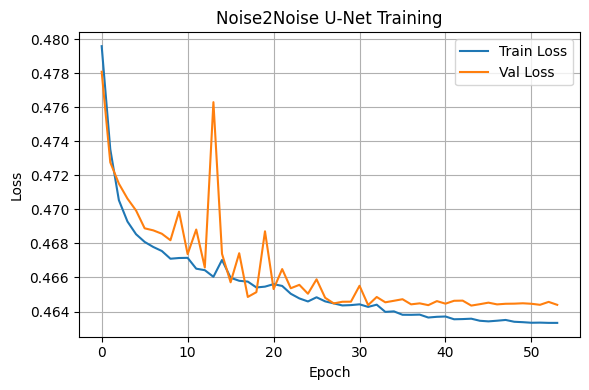

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step

🔍 Test Set Metrics:
PSNR → mean: 16.97, std: 0.77, 95% CI: (16.83, 17.12)
SSIM → mean: 0.0933, std: 0.0493, 95% CI: (0.0839, 0.1028)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

🚀 Inference Speed:
Batch: total 0.2s, avg 0.0018s/img
Per-img: mean 0.0684s, std 0.0021s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Galaxy 004 → PSNR: 14.59, SSIM: 0.4345


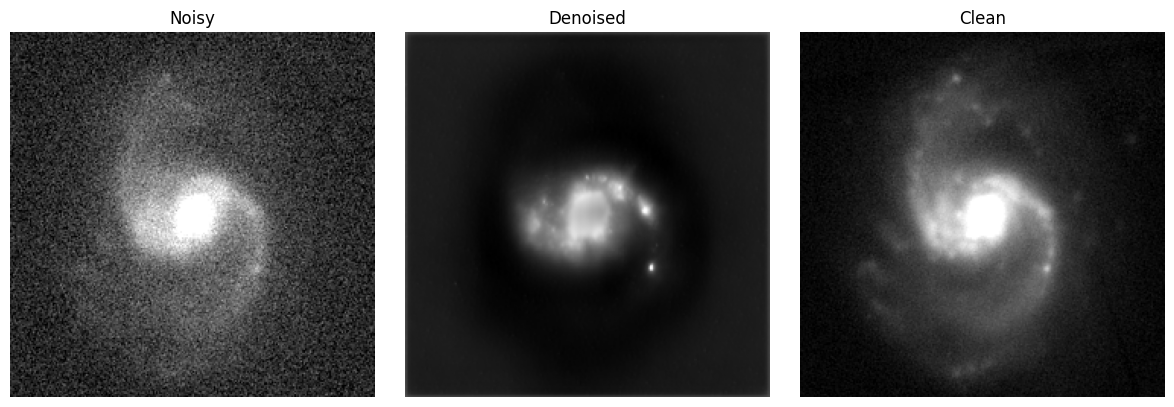

In [5]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from astropy.io import fits

# -------------------------------
# 1. Load & preprocess data
# -------------------------------
X = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/noisy.npy")
Y = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/clean.npy")

X = np.clip(X, 0, 1).astype(np.float32)
Y = np.clip(Y, 0, 1).astype(np.float32)
if X.ndim == 3: X = X[...,None]
if Y.ndim == 3: Y = Y[...,None]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# -------------------------------
# 2. Loss & U-Net builder
# -------------------------------
def ssim_mse_loss(y_true, y_pred):
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse  = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.5*mse + 0.5*(1-ssim)

def build_unet(input_shape=(240,240,1), base_filters=32, depth=3):
    inputs = layers.Input(input_shape)
    x = inputs; skips = []
    # encoder
    for d in range(depth):
        f = base_filters*(2**d)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        skips.append(x)
        x = layers.MaxPooling2D()(x)
    # bottleneck
    f = base_filters*(2**depth)
    x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    # decoder
    for d in reversed(range(depth)):
        f = base_filters*(2**d)
        x = layers.UpSampling2D()(x)
        x = layers.Concatenate()([x, skips[d]])
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    outputs = layers.Conv2D(1,1,padding='same',activation='sigmoid')(x)
    return models.Model(inputs, outputs)

# -------------------------------
# 3. Compile & train with timing
# -------------------------------
model = build_unet(input_shape=X_train.shape[1:])
model.compile(optimizer=optimizers.Adam(1e-4), loss=ssim_mse_loss)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_best.h5",
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
]

print("🕒 Starting training...")
t_start = time.time()
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=8,
    callbacks=callbacks,
    shuffle=True
)
train_time = time.time() - t_start
print(f"✅ Training done in {train_time/60:.2f} min ({train_time:.1f} s)")

# -------------------------------
# 4. Save final model
# -------------------------------
final_path = "/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5"
model.save(final_path)
print(f"💾 Final model saved to {final_path}")

# -------------------------------
# 5. Plot loss curves
# -------------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Noise2Noise U-Net Training')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# -------------------------------
# 6. Evaluate PSNR/SSIM on test set
# -------------------------------
preds = model.predict(X_test, batch_size=8)
psnrs, ssims = [], []
for i in range(len(X_test)):
    clean = Y_test[i,...,0]
    den   = preds[i,...,0]
    psnrs.append(peak_signal_noise_ratio(clean, den, data_range=1.0))
    ssims.append(structural_similarity(clean, den, data_range=1.0))
psnrs = np.array(psnrs); ssims = np.array(ssims)

def compute_stats(arr, alpha=0.05):
    m = arr.mean(); s = arr.std(ddof=0); n = arr.size
    z = stats.norm.ppf(1 - alpha/2)
    ci = (m - z*(s/np.sqrt(n)), m + z*(s/np.sqrt(n)))
    return m, s, ci

psnr_m, psnr_s, psnr_ci = compute_stats(psnrs)
ssim_m,  ssim_s,  ssim_ci = compute_stats(ssims)

print(f"\n🔍 Test Set Metrics:")
print(f"PSNR → mean: {psnr_m:.2f}, std: {psnr_s:.2f}, "
      f"95% CI: ({psnr_ci[0]:.2f}, {psnr_ci[1]:.2f})")
print(f"SSIM → mean: {ssim_m:.4f}, std: {ssim_s:.4f}, "
      f"95% CI: ({ssim_ci[0]:.4f}, {ssim_ci[1]:.4f})")

# -------------------------------
# 7. Measure inference speed
# -------------------------------
t0 = time.time()
_ = model.predict(X_test, batch_size=8)
batch_time = time.time() - t0
times = []
for img in X_test:
    t1 = time.time()
    _ = model.predict(img[None,...], verbose=0)
    times.append(time.time()-t1)
times = np.array(times)

print(f"\n🚀 Inference Speed:")
print(f"Batch: total {batch_time:.1f}s, avg {batch_time/len(X_test):.4f}s/img")
print(f"Per-img: mean {times.mean():.4f}s, std {times.std():.4f}s")

# -------------------------------
# 8. Single-image FITS evaluation
# -------------------------------
def load_fits_normalized(path):
    with fits.open(path) as hdul:
        img = hdul[0].data.astype(np.float32)
    img = np.nan_to_num(img, nan=0.0, posinf=0.0, neginf=0.0)
    p1, p99 = np.percentile(img, (1, 99))
    img = np.clip(img, p1, p99)
    img = (img - p1) / (p99 - p1 + 1e-8)
    return np.log1p(img) / np.log1p(1.0)

noisy_004 = load_fits_normalized(
    "/content/drive/MyDrive/PS1_Dataset/renamed/noisy/galaxy_004_noisy.fits"
)
clean_004 = load_fits_normalized(
    "/content/drive/MyDrive/PS1_Dataset/renamed/clean/galaxy_004_clean.fits"
)
inp = noisy_004[np.newaxis,...,np.newaxis]
denoised_004 = model.predict(inp)[0,...,0]

psnr_004 = peak_signal_noise_ratio(clean_004, denoised_004, data_range=1.0)
ssim_004 = structural_similarity(clean_004, denoised_004, data_range=1.0)
print(f"\nGalaxy 004 → PSNR: {psnr_004:.2f}, SSIM: {ssim_004:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax in axes: ax.axis('off')
axes[0].imshow(noisy_004, cmap='gray');    axes[0].set_title("Noisy")
axes[1].imshow(denoised_004, cmap='gray'); axes[1].set_title("Denoised")
axes[2].imshow(clean_004, cmap='gray');    axes[2].set_title("Clean")
plt.tight_layout()
plt.show()



# Noise2Noise U-Net Training & Evaluation Script


1. Loads and preprocesses noisy and clean NumPy arrays (SDSS dataset).
2. Splits data into training (90%) and test (10%) sets.
3. Defines data augmentation functions: Gaussian noise, salt-and-pepper noise, Poisson noise, and mixed noise.
4. Augments the training set and concatenates original + augmented data.
5. Builds a U-Net model with a custom SSIM+MSE loss function.
6. Compiles and trains the model with callbacks for checkpointing, early stopping, and learning rate reduction, tracking total training time.
7. Saves both the best checkpoint and the final trained model to Google Drive.
8. Plots training and validation loss curves for visual monitoring.
9. Evaluates the test set by computing per-image PSNR and SSIM, then reports mean, standard deviation, and 95% confidence intervals.
10. Measures inference speed on the test set (batch and per-image timings).
11. Loads a sample PS1 FITS image pair, normalizes and logs stretches it, runs single-image inference, computes PSNR/SSIM, and displays noisy, denoised, and clean images side-by-side.

Modify file paths, hyperparameters, and model depth as needed for your experiment.


Original train size: 945; After augment: 1890
🕒 Starting training on augmented data...
Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4821

237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - loss: 0.4821 - val_loss: 0.4724 - learning_rate: 1.0000e-04
Epoch 2/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4751

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4751 - val_loss: 0.4710 - learning_rate: 1.0000e-04
Epoch 3/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4739

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4739 - val_loss: 0.4704 - learning_rate: 1.0000e-04
Epoch 4/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4731

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4731 - val_loss: 0.4699 - learning_rate: 1.0000e-04
Epoch 5/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4734

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4734 - val_loss: 0.4696 - learning_rate: 1.0000e-04
Epoch 6/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4727

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4727 - val_loss: 0.4692 - learning_rate: 1.0000e-04
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4724 - val_loss: 0.4694 - learning_rate: 1.0000e-04
Epoch 8/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4725

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4725 - val_loss: 0.4678 - learning_rate: 1.0000e-04
Epoch 9/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4720

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4720 - val_loss: 0.4676 - learning_rate: 1.0000e-04
Epoch 10/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4720

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4720 - val_loss: 0.4676 - learning_rate: 1.0000e-04
Epoch 11/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4717

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4717 - val_loss: 0.4672 - learning_rate: 1.0000e-04
Epoch 12/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4712 - val_loss: 0.4675 - learning_rate: 1.0000e-04
Epoch 13/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4712

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4712 - val_loss: 0.4664 - learning_rate: 1.0000e-04
Epoch 14/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4715 - val_loss: 0.4667 - learning_rate: 1.0000e-04
Epoch 15/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4711

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4711 - val_loss: 0.4660 - learning_rate: 1.0000e-04
Epoch 16/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4712

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4712 - val_loss: 0.4656 - learning_rate: 1.0000e-04
Epoch 17/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4709 - val_loss: 0.4657 - learning_rate: 1.0000e-04
Epoch 18/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4708

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.4708 - val_loss: 0.4655 - learning_rate: 1.0000e-04
Epoch 19/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4705 - val_loss: 0.4660 - learning_rate: 1.0000e-04
Epoch 20/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4709 - val_loss: 0.4662 - learning_rate: 1.0000e-04
Epoch 21/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4693 - val_loss: 0.4658 - learning_rate: 1.0000e-04
Epoch 22/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4701

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.4701 - val_loss: 0.4653 - learning_rate: 5.0000e-05
Epoch 23/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4694 - val_loss: 0.4658 - learning_rate: 5.0000e-05
Epoch 24/100
235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4694

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.4694 - val_loss: 0.4651 - learning_rate: 5.0000e-05
Epoch 25/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4692 - val_loss: 0.4654 - learning_rate: 5.0000e-05
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4693 - val_loss: 0.4656 - learning_rate: 5.0000e-05
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4687 - val_loss: 0.4654 - learning_rate: 5.0000e-05
Epoch 28/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4676 - val_loss: 0.4659 - learning_rate: 5.0000e-05
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4690 - val_loss: 0.4654 - learning_rate: 5.0000e-05
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4676 - val_loss: 0.4656 - learning_rate: 2.5000e-05
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4679 - val_loss: 0.4660 - learning_rate: 2.5000e-05
Epoch 32/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.4678 - val_l

✅ Training done in 2.91 min (174.4 s)
💾 Final model saved to /content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5


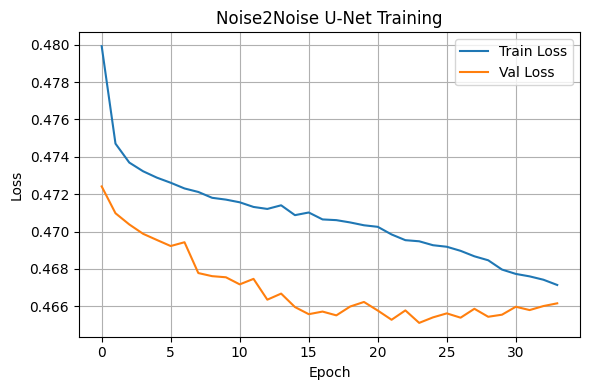

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

🔍 Test Set Metrics:
PSNR → mean: 16.77, std: 0.85, 95% CI: (16.61, 16.93)
SSIM → mean: 0.0928, std: 0.0481, 95% CI: (0.0836, 0.1020)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

🚀 Inference Speed:
Batch: total 0.2s, avg 0.0019s/img
Per-img: mean 0.0681s, std 0.0028s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Galaxy 004 → PSNR: 14.23, SSIM: 0.4009


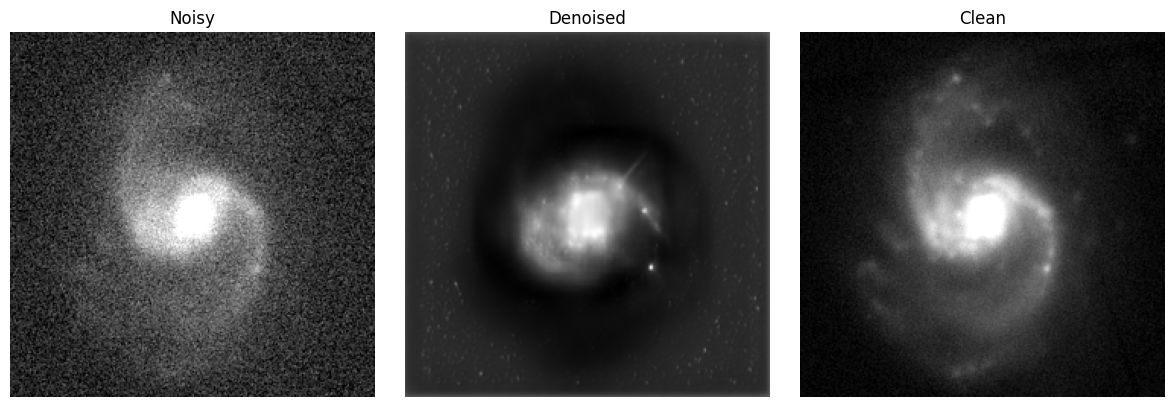

In [6]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from astropy.io import fits

# -------------------------------
# 1. Load & preprocess data
# -------------------------------
X = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/noisy.npy")
Y = np.load("/content/drive/MyDrive/SDSS_augmented_npy/train/clean.npy")

X = np.clip(X, 0, 1).astype(np.float32)
Y = np.clip(Y, 0, 1).astype(np.float32)
if X.ndim == 3: X = X[..., None]
if Y.ndim == 3: Y = Y[..., None]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# -------------------------------
# 2. Data Augmentation Functions
# -------------------------------
def add_gaussian_noise(image, std=0.05):
    return np.clip(image + np.random.normal(0, std, image.shape), 0.0, 1.0)

def add_salt_and_pepper(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = image.copy()
    h, w = image.shape[:2]
    # Salt
    coords = (np.random.randint(0, h, int(h*w*salt_prob)),
              np.random.randint(0, w, int(h*w*salt_prob)))
    noisy_image[coords[0], coords[1], 0] = 1.0
    # Pepper
    coords = (np.random.randint(0, h, int(h*w*pepper_prob)),
              np.random.randint(0, w, int(h*w*pepper_prob)))
    noisy_image[coords[0], coords[1], 0] = 0.0
    return noisy_image

def add_poisson_noise(image):
    return np.clip(np.random.poisson(image * 255) / 255.0, 0, 1)

def add_mixed_noise(image):
    return (add_gaussian_noise(image, std=0.05)
            if np.random.rand() < 0.5
            else add_salt_and_pepper(image))

def augment_data(X, Y):
    """Generate noisy input–target pairs."""
    X_aug = np.array([add_mixed_noise(img) for img in X])
    Y_aug = np.array([add_mixed_noise(img) for img in Y])
    return X_aug, Y_aug

# -------------------------------
# 3. Create augmented training set
# -------------------------------
X_train_aug, Y_train_aug = augment_data(X_train, Y_train)

# Combine original + augmented
X_train_comb = np.concatenate([X_train, X_train_aug], axis=0)
Y_train_comb = np.concatenate([Y_train, Y_train_aug], axis=0)

print(f"Original train size: {len(X_train)}; After augment: {len(X_train_comb)}")

# -------------------------------
# 4. Loss & U-Net builder
# -------------------------------
def ssim_mse_loss(y_true, y_pred):
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    mse  = tf.reduce_mean(tf.square(y_true - y_pred))
    return 0.5*mse + 0.5*(1-ssim)

def build_unet(input_shape=(240,240,1), base_filters=32, depth=3):
    inputs = layers.Input(input_shape)
    x = inputs; skips = []
    for d in range(depth):
        f = base_filters*(2**d)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        skips.append(x)
        x = layers.MaxPooling2D()(x)
    f = base_filters*(2**depth)
    x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    for d in reversed(range(depth)):
        f = base_filters*(2**d)
        x = layers.UpSampling2D()(x)
        x = layers.Concatenate()([x, skips[d]])
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
        x = layers.Conv2D(f,3,padding='same',activation='relu')(x)
    outputs = layers.Conv2D(1,1,padding='same',activation='sigmoid')(x)
    return models.Model(inputs, outputs)

# -------------------------------
# 5. Compile & train with timing
# -------------------------------
model = build_unet(input_shape=X_train_comb.shape[1:])
model.compile(optimizer=optimizers.Adam(1e-4), loss=ssim_mse_loss)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_best.h5",
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
]

print("🕒 Starting training on augmented data...")
t_start = time.time()
history = model.fit(
    X_train_comb, Y_train_comb,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=8,
    callbacks=callbacks,
    shuffle=True
)
train_time = time.time() - t_start
print(f"✅ Training done in {train_time/60:.2f} min ({train_time:.1f} s)")

# -------------------------------
# 6. Save final model
# -------------------------------
final_path = "/content/drive/MyDrive/PS1_Models/n2n_sdss_unet_final.h5"
model.save(final_path)
print(f"💾 Final model saved to {final_path}")

# -------------------------------
# 7. Plot loss curves
# -------------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Noise2Noise U-Net Training')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# -------------------------------
# 8. Evaluate PSNR/SSIM on test set
# -------------------------------
preds = model.predict(X_test, batch_size=8)
psnrs, ssims = [], []

for i in range(len(X_test)):
    clean = Y_test[i,...,0]
    den   = preds[i,...,0]
    psnrs.append(peak_signal_noise_ratio(clean, den, data_range=1.0))
    ssims.append(structural_similarity(clean, den, data_range=1.0))

psnrs = np.array(psnrs); ssims = np.array(ssims)

def compute_stats(arr, alpha=0.05):
    m = arr.mean(); s = arr.std(ddof=0); n = arr.size
    z = stats.norm.ppf(1 - alpha/2)
    ci = (m - z*(s/np.sqrt(n)), m + z*(s/np.sqrt(n)))
    return m, s, ci

psnr_m, psnr_s, psnr_ci = compute_stats(psnrs)
ssim_m,  ssim_s,  ssim_ci = compute_stats(ssims)

print(f"\n🔍 Test Set Metrics:")
print(f"PSNR → mean: {psnr_m:.2f}, std: {psnr_s:.2f}, "
      f"95% CI: ({psnr_ci[0]:.2f}, {psnr_ci[1]:.2f})")
print(f"SSIM → mean: {ssim_m:.4f}, std: {ssim_s:.4f}, "
      f"95% CI: ({ssim_ci[0]:.4f}, {ssim_ci[1]:.4f})")

# -------------------------------
# 9. Measure inference speed
# -------------------------------
t0 = time.time()
_ = model.predict(X_test, batch_size=8)
batch_time = time.time() - t0
times = []
for img in X_test:
    t1 = time.time()
    _ = model.predict(img[None,...], verbose=0)
    times.append(time.time()-t1)
times = np.array(times)

print(f"\n🚀 Inference Speed:")
print(f"Batch: total {batch_time:.1f}s, avg {batch_time/len(X_test):.4f}s/img")
print(f"Per-img: mean {times.mean():.4f}s, std {times.std():.4f}s")

# -------------------------------
# 10. Single-image FITS evaluation
# -------------------------------
def load_fits_normalized(path):
    with fits.open(path) as hdul:
        img = hdul[0].data.astype(np.float32)
    img = np.nan_to_num(img, nan=0.0, posinf=0.0, neginf=0.0)
    p1, p99 = np.percentile(img, (1, 99))
    img = np.clip(img, p1, p99)
    img = (img - p1) / (p99 - p1 + 1e-8)
    return np.log1p(img) / np.log1p(1.0)

noisy_004 = load_fits_normalized(
    "/content/drive/MyDrive/PS1_Dataset/renamed/noisy/galaxy_004_noisy.fits"
)
clean_004 = load_fits_normalized(
    "/content/drive/MyDrive/PS1_Dataset/renamed/clean/galaxy_004_clean.fits"
)
inp = noisy_004[np.newaxis,...,np.newaxis]
denoised_004 = model.predict(inp)[0,...,0]

psnr_004 = peak_signal_noise_ratio(clean_004, denoised_004, data_range=1.0)
ssim_004 = structural_similarity(clean_004, denoised_004, data_range=1.0)
print(f"\nGalaxy 004 → PSNR: {psnr_004:.2f}, SSIM: {ssim_004:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax in axes: ax.axis('off')
axes[0].imshow(noisy_004, cmap='gray');    axes[0].set_title("Noisy")
axes[1].imshow(denoised_004, cmap='gray'); axes[1].set_title("Denoised")
axes[2].imshow(clean_004, cmap='gray');    axes[2].set_title("Clean")
plt.tight_layout()
plt.show()
